# Database Normalization

When creating a database, it is really important to think about how data will be stored. This is known as **normalization**, and it is a huge part of most SQL classes.

There are essentially three ideas that are aimed at database normalization:

1. Are the tables storing logical groupings of the data?
2. Can I make changes in a single location, rather than in many tables for the same information?
3. Can I access and manipulate data quickly and efficiently?


- [More details on Database Normalization](https://www.itprotoday.com/sql-server/sql-design-why-you-need-database-normalization)
- [Data Normalization Best practice](http://agiledata.org/essays/dataNormalization.html)


# Using Join


The whole purpose of `JOIN` statements is to allow us to pull data from more than one table at a time.

## The first join

```SQL
SELECT orders.*
FROM orders
JOIN accounts
ON orders.account_id = accounts.id;
```

#### Selecting specific column from different tables
```SQL
SELECT accounts.name, orders.occurred_at
FROM orders
JOIN accounts
ON orders.account_id = accounts.id;
```

## Primary and Foreign Keys

#### Primary Key (PK)
A primary key is a unique column in a particular table. This is the first column in each of our tables.

#### Foreign Key (FK)
A foreign key is a column in one table that is a primary key in a different table, in other words, a foreign key is linked to the primary key of another table.

#### Joining tables with PK and FK
The way we join any two tables is in this way: linking the PK and FK (generally in an ON statement).

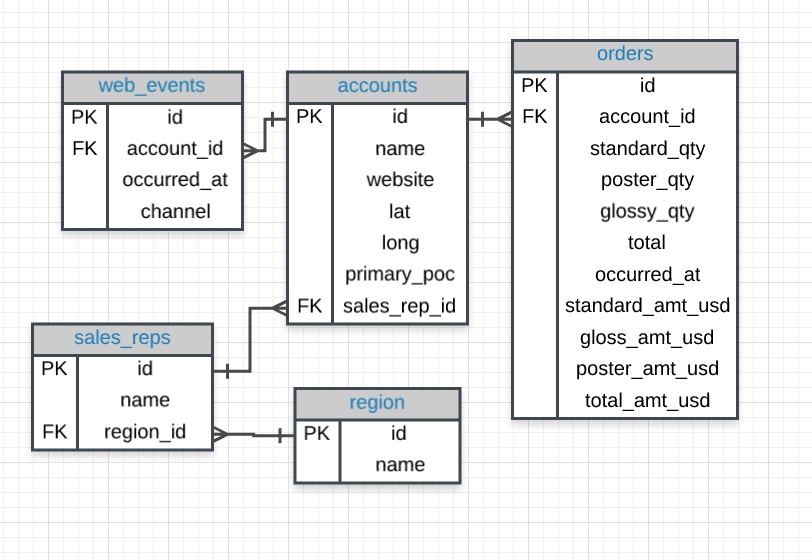

#### Joining more than 2 tables

The same logic to join 3 tables:

```SQL
SELECT web_events.channel, accounts.name, orders.total
FROM web_events
JOIN accounts
ON web_events.account_id = accounts.id
JOIN orders
ON accounts.id = orders.account_id
```

## Use Alias

Use alias for table name, column name.
- We can simply write our alias directly after the column name (in the `SELECT`) or 
- table name (in the `FROM` or `JOIN`) directly following the table we would like to alias. 
- But we can also use `AS` to make it look more readable.

For example:
```SQL
Select order.column1 aliasname1, t2.column2 aliasname2
FROM tablename AS t1
JOIN tablename2 AS t2
```


Provide a table for all web_events associated with account name of `"Walmart"`. There should be three columns. Be sure to include the `primary_poc`, time of the event, and the channel for each event. Additionally, you might choose to add a fourth column to assure only `"Walmart"` events were chosen.
```SQL
SELECT a.name, a.primary_poc, w.occurred_at, w.channel
FROM web_events w
JOIN accounts a
  ON w.account_id = a.id
WHERE a.name = 'Walmart'
```


Provide a table that provides the region for each sales_rep along with their associated accounts. Your final table should include three columns: the region name, the sales rep name, and the account name. Sort the accounts alphabetically (A-Z) according to account name.
```SQL
SELECT r.name region, s.name sales, a.name account
FROM sales_reps s
JOIN region r
ON s.region_id = r.id
JOIN accounts a
ON a.sales_rep_id = s.id 
ORDER BY account;
```

Provide the name for each region for every order, as well as the account name and the unit price they paid (total_amt_usd/total) for the order. Your final table should have 3 columns: region name, account name, and unit price. A few accounts have 0 for total, so I divided by (total + 0.01) to assure not dividing by zero.
```SQL
SELECT r.name region, a.name account, o.total_amt_usd/(total+0.01) unit_price
FROM region r
JOIN sales_reps s
ON s.region_id = r.id
JOIN accounts a
ON a.sales_rep_id = s.id
JOIN orders o
ON o.account_id = a.id;
```

#### Do you know?

- It might be nice if SQL enforced JOINs to be PK = FK, but if you want to join company name to the last name of another column, SQL will let you do it!

- Though JOINs are the main way we will pull data together from multiple tables, they are actually not the only way for us to pull data from multiple tables.

# INNER, LEFT, RIGHT and OUTER joins

## Overview 

### `JOIN` - INNER JOIN

- `JOIN`(INNER JOIN) gets the intersection of two tables.
- That is, we have always pulled rows only if they exist as a match across two tables.


### `LEFT JOIN` and `RIGHT JOIN`

- `LEFT JOIN` returns all the values from the left table, plus matched values from the right table or `NULL` in case of no matching join predicate.
- `LEFT OUTER JOIN` is the same as `LEFT JOIN`
- `RIGHT JOIN` just does the opposite.


### `FULL OUTER JOIN`

- `FULL OUTER JOIN` returnS the inner join result set, as well as any unmatched rows from either of the two tables being joined.
- As this returns rows that do not match one another from the two tables. [The use cases](https://stackoverflow.com/questions/2094793/when-is-a-good-situation-to-use-a-full-outer-join) for a full outer join are very rare.
- `FULL JOIN` is the same as `FULL OUTER JOIN`


## Dig deeper in `LEFT JOIN`

For a LEFT JOIN like the one here:
```SQL
SELECT c.countryid, c.countryName, s.stateName
FROM Country c
LEFT JOIN State s
ON c.countryid = s.countryid;
```

We are essentially joing the matching **PK-FK** links from the two tables, as we did before, but we are also pulling all the additional rows from the `Country` table even if they don't have a match in the `State` table. Therefore, we obtain all the rows of the `INNER JOIN`, but we also get additional rows from the table in the `FROM`.
![screen-shot-2017-08-14-at-4.04.44-pm.png](attachment:screen-shot-2017-08-14-at-4.04.44-pm.png)

The resulting table will look like:

| countryid   | countryName | stateName |
| ----------- | ----------- | ----------- |
| 1|India      | Maharashtra  |        
| 1|India   | Punjab        |        
| 2|Nepal |  Kathmandu |        
| 3|United States | California  |        
| 3|United States |  Texas |        
| 4|Canada | Alberta  |        
| 5|Sri Lanka | NULL  |        
| 6|Brazil|  NULL |        


#### How if we flip the tables?

If we use `State` table as left table, we would actually obtain the same exact result as the `JOIN` statement.
```SQL
SELECT c.countryid, c.countryName, s.stateName
FROM State s
LEFT JOIN Country c
ON c.countryid = s.countryid;
```

This is because if `State` is on the LEFT table, all of the rows exist in the RIGHT table again.
![screen-shot-2017-08-14-at-4.10.54-pm.png](attachment:screen-shot-2017-08-14-at-4.10.54-pm.png)

| countryid   | countryName | stateName |
| ----------- | ----------- | ----------- |
| 1|India      | Maharashtra  |        
| 1|India   | Punjab        |        
| 2|Nepal |  Kathmandu |        
| 3|United States | California  |        
| 3|United States |  Texas |        
| 4|Canada | Alberta  |  


## JOINS and Filtering


### Filtering in `LEFT JOIN` 

#### Filter in the `WHERE` clause after `LEFT JOIN`

The following query will return all orders and accounts handled by sales rep with her id `=321500`:

```SQL
SELECT o.*, a.*
FROM orders o
LEFT JOIN accounts a
       ON o.account_id = a.id
WHERE a.sales_rep_id = 321500
```
> Think of the join is executed to build the new result set first. That result set is then filtered using the WHERE clause.

#### Filter in the `ON` clause of `LEFT JOIN`

If we change `WHERE` to `AND`, what would happen?

```SQL
SELECT o.*, a.*
FROM orders o
LEFT JOIN accounts a
       ON o.account_id = a.id AND a.sales_rep_id=321500
```
> the result will return all data in `orders` table plus the dataset in `accounts` where `sales_rep_id=321500`.


### Filtering in `INNER JOIN`

However, for `INNER JOIN`, moving the filter to the `ON` clause of an inner join will produce the same result as keeping it in the `WHERE` clause.


### Final Quiz


1. Provide a table that provides the region for each sales_rep along with their associated accounts. This time only for the Midwest region. Your final table should include three columns: the region name, the sales rep name, and the account name. Sort the accounts alphabetically (A-Z) according to account name.
```SQL
SELECT r.name region, s.name sales, a.name account
FROM region r
JOIN sales_reps s
ON s.region_id = r.id
JOIN accounts a
ON a.sales_rep_id = s.id
WHERE r.name='Midwest'
ORDER BY account
```

2. Provide a table that provides the region for each sales_rep along with their associated accounts. This time only for accounts where the sales rep has a first name starting with S and in the Midwest region. Your final table should include three columns: the region name, the sales rep name, and the account name. Sort the accounts alphabetically (A-Z) according to account name.
```SQL
SELECT r.name region, s.name sales, a.name account
FROM region r
JOIN sales_reps s
ON s.region_id = r.id
JOIN accounts a
ON a.sales_rep_id = s.id
WHERE r.name='Midwest' AND s.name LIKE 'S%'
ORDER BY account
```

3. Provide a table that provides the region for each sales_rep along with their associated accounts. This time only for accounts where the sales rep has a last name starting with K and in the Midwest region. Your final table should include three columns: the region name, the sales rep name, and the account name. Sort the accounts alphabetically (A-Z) according to account name.
```SQL
SELECT r.name region, s.name sales, a.name account
FROM region r
JOIN sales_reps s
ON s.region_id = r.id
JOIN accounts a
ON a.sales_rep_id = s.id
WHERE r.name='Midwest' AND s.name LIKE '% K%'
ORDER BY account
```

4. Provide the name for each region for every order, as well as the account name and the unit price they paid (total_amt_usd/total) for the order. However, you should only provide the results if the standard order quantity exceeds 100. Your final table should have 3 columns: region name, account name, and unit price. In order to avoid a division by zero error, adding .01 to the denominator here is helpful total_amt_usd/(total+0.01).
```SQL
SELECT r.name region, a.name account, o.total_amt_usd/o.total+0.01 unit_price
FROM orders o
JOIN accounts a ON o.account_id = a.id
JOIN sales_reps s ON a.sales_rep_id = s.id
JOIN region r ON s.region_id = r.id
WHERE o.standard_qty > 100
ORDER BY unit_price
```

5. Provide the name for each region for every order, as well as the account name and the unit price they paid (total_amt_usd/total) for the order. However, you should only provide the results if the standard order quantity exceeds 100 and the poster order quantity exceeds 50. Your final table should have 3 columns: region name, account name, and unit price. Sort for the smallest unit price first. In order to avoid a division by zero error, adding .01 to the denominator here is helpful (total_amt_usd/(total+0.01).
```SQL
SELECT r.name region, a.name account, o.total_amt_usd/o.total+0.01 unit_price
FROM orders o
JOIN accounts a ON o.account_id = a.id
JOIN sales_reps s ON a.sales_rep_id = s.id
JOIN region r ON s.region_id = r.id
WHERE o.standard_qty > 100 AND o.poster_qty > 50
ORDER BY unit_price
```

6. Provide the name for each region for every order, as well as the account name and the unit price they paid (total_amt_usd/total) for the order. However, you should only provide the results if the standard order quantity exceeds 100 and the poster order quantity exceeds 50. Your final table should have 3 columns: region name, account name, and unit price. Sort for the largest unit price first. In order to avoid a division by zero error, adding .01 to the denominator here is helpful (total_amt_usd/(total+0.01).
```SQL
SELECT r.name region, a.name account, o.total_amt_usd/o.total+0.01 unit_price
FROM orders o
JOIN accounts a ON o.account_id = a.id
JOIN sales_reps s ON a.sales_rep_id = s.id
JOIN region r ON s.region_id = r.id
WHERE o.standard_qty > 100 AND o.poster_qty > 50
ORDER BY unit_price DESC
```

7. What are the different channels used by account id 1001? Your final table should have only 2 columns: account name and the different channels. You can try SELECT DISTINCT to narrow down the results to only the unique values.
```SQL
SELECT DISTINCT a.name, w.channel
FROM accounts a
JOIN web_events w
ON a.id = w.account_id AND a.id=1001
```

8. Find all the orders that occurred in 2015. Your final table should have 4 columns: occurred_at, account name, order total, and order total_amt_usd.
```SQL
SELECT o.occurred_at, a.name account, o.total, o.total_amt_usd
FROM orders o
JOIN accounts a 
ON o.account_id = a.id
WHERE o.occurred_at BETWEEN '2015-01-01' AND '2015-12-31'
ORDER BY o.occurred_at DESC
```


# Advanced JOINs

This course hasn't covered the following advanced joins. However, I have studied in DataCamp program. Check the notes for these Joins for details.

### `UNION` and `UNION ALL`
[W3resource - UNION, UNION ALL](https://www.w3schools.com/sql/sql_union.asp)

### `CROSS JOIN`
[W3resource - CROSS JOIN](https://www.w3resource.com/sql/joins/cross-join.php)

### `SELF JOIN`

[W3recource - SELF JOIN](https://www.w3resource.com/sql/joins/perform-a-self-join.php)

